# Ukraine War Sentiment Analysis

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from collections import Counter


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tanve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanve\AppData\Roaming\nltk_data...


True

### Exploratory Data Analysis

In [6]:
tweets_df = pd.read_csv('./data/tweets.csv')
tweets_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10014 non-null  int64  
 1   conversation_id  10014 non-null  int64  
 2   created_at       10014 non-null  object 
 3   date             10014 non-null  object 
 4   time             10014 non-null  object 
 5   timezone         10014 non-null  int64  
 6   user_id          10014 non-null  int64  
 7   username         10014 non-null  object 
 8   name             10014 non-null  object 
 9   place            3 non-null      object 
 10  tweet            10014 non-null  object 
 11  language         10014 non-null  object 
 12  mentions         10014 non-null  object 
 13  urls             10014 non-null  object 
 14  photos           10014 non-null  object 
 15  replies_count    10014 non-null  int64  
 16  retweets_count   10014 non-null  int64  
 17  likes_count 

In [8]:
tweets_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10014.0,1.630348e+18,1.007272e+13,1.630331e+18,1.630339e+18,1.630347e+18,1.630356e+18,1.630366e+18
conversation_id,10014.0,1.629356e+18,1.450302e+16,9.012334e+17,1.630187e+18,1.630306e+18,1.630342e+18,1.630366e+18
timezone,10014.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
user_id,10014.0,8.634429e+17,6.762363e+17,5.852300e+04,1.463392e+09,1.146196e+18,1.498023e+18,1.630339e+18
replies_count,10014.0,4.054324e-01,2.764969e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.250000e+02
retweets_count,10014.0,4.992011e-01,7.684152e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.790000e+02
likes_count,10014.0,2.399041e+00,3.021759e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.524000e+03
video,10014.0,1.085480e-01,3.110868e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
near,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [10]:
tweets_df.drop_duplicates(inplace=True)

In [13]:
tweets_df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10011
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9235
video                  0
thumbnail           8927
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

### Top Ten Languages

In [14]:
tweets_df["language"].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [16]:
language_top_ten = tweets_df["language"].value_counts().head(10)

In [28]:
language_top_ten_df = pd.DataFrame(language_top_ten)
language_top_ten_df

,count
language,
en,8858
pt,440
it,194
qme,105
und,60
in,47
ru,44
ja,42
es,36


In [31]:
language_top_ten_df.index

Index(['en', 'pt', 'it', 'qme', 'und', 'in', 'ru', 'ja', 'es', 'ca'], dtype='object', name='language')

In [32]:
language_names = ['English', 'Portuguese', 'Italian', 'Middle Egyptian', 'Undetermined', 'Indonesian', 'Russian', 'Japanese', 'Spanish', 'Catalan']

In [33]:
language_top_ten_df.index = language_names

In [34]:
language_top_ten_df.index

Index(['English', 'Portuguese', 'Italian', 'Middle Egyptian', 'Undetermined',
       'Indonesian', 'Russian', 'Japanese', 'Spanish', 'Catalan'],
      dtype='object')

Text(0, 0.5, 'Language')

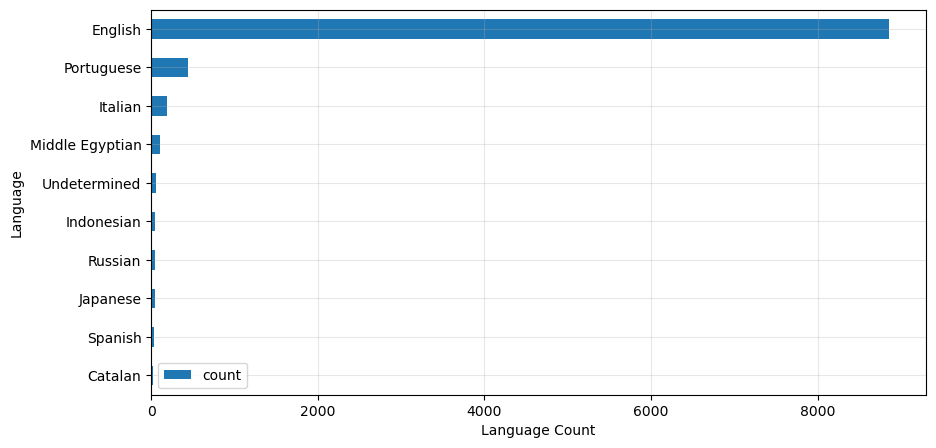

In [37]:
language_top_ten_df.sort_values(by='count',ascending=True).plot(kind='barh',figsize=(10,5))
plt.grid(alpha=0.3)
plt.xlabel("Language Count")
plt.ylabel("Language")

### Word Cloud - Most Frequent Words

#### Tweet Natural Language Processing

In [133]:
new_stop_words = ["https","t",".","u","e","co","de","tri"]
en_stop_words = set(stopwords.words('english'))
en_stop_words.update(new_stop_words)

In [134]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [140]:
def processTweet(tweet):
    tweet = tweet.lower() #lowercase
    tweet  = ''.join([char for char in tweet if char not in string.punctuation]) #remove punctuation
    
    tokens = word_tokenize(tweet) #tokenization
    tokens = [word for word in tokens if word not in en_stop_words] #remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #lemmatization
    tokens = [stemmer.stem(word) for word in tokens] #stemminization
    processed_tweet = ' '.join(tokens) #join all tokens back to a sentence
    return processed_tweet

##### Test processTweet function

In [135]:
testTweet = """Whether or not the Covid lab leak is true, it's now politically/monetarily expedient since China is trying to get in on the Ukraine/Russia pie. https @jesseprimetime """

In [136]:
testTweet = testTweet.lower()
testTweet

"whether or not the covid lab leak is true, it's now politically/monetarily expedient since china is trying to get in on the ukraine/russia pie. https @jesseprimetime "

In [137]:
testTweet = ''.join([char for char in testTweet if char not in string.punctuation])
print(testTweet)

whether or not the covid lab leak is true its now politicallymonetarily expedient since china is trying to get in on the ukrainerussia pie https jesseprimetime 


In [138]:
test_tokens = word_tokenize(testTweet)
test_tokens

['whether',
 'or',
 'not',
 'the',
 'covid',
 'lab',
 'leak',
 'is',
 'true',
 'its',
 'now',
 'politicallymonetarily',
 'expedient',
 'since',
 'china',
 'is',
 'trying',
 'to',
 'get',
 'in',
 'on',
 'the',
 'ukrainerussia',
 'pie',
 'https',
 'jesseprimetime']

In [139]:
test_tokens = [word for word in test_tokens if word not in en_stop_words]
test_tokens

['whether',
 'covid',
 'lab',
 'leak',
 'true',
 'politicallymonetarily',
 'expedient',
 'since',
 'china',
 'trying',
 'get',
 'ukrainerussia',
 'pie',
 'jesseprimetime']

In [103]:
print(processTweet(testTweet))

whether covid lab leak true politicallymonetarili expedi sinc china tri get ukrainerussia pie tactic make competit busi look bad dont get contract jessebwatt nail jesseprimetim


In [141]:
tweets_df['processed_tweet'] = tweets_df['tweet'].apply(processTweet)

In [142]:
tweets_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,processed_tweet
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN,nazijaeg derwen anonymous9775 russia place sat...
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,russia haarp could destroy usa one fell swoop ...
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,putin give steven seagal russiaamp8217 order f...
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN,mainelif baddcompani ’ alway project russia
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN,pottingpink mfarussia modrussia milhistrf muze...


#### Word Cloud Generation

In [147]:
all_tweets = ' '.join(tweets_df['processed_tweet'].tolist())

In [149]:
print(len(all_tweets))

1284845


In [150]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

(-0.5, 799.5, 399.5, -0.5)

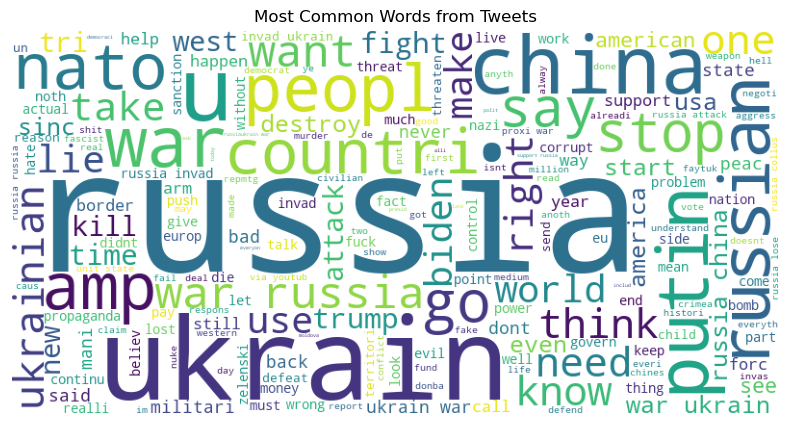

In [185]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title("Most Common Words from Tweets")
plt.axis('off')


## Sentiment Analysis

In [164]:
tweets_sentiment_df = tweets_df[["username", "tweet","processed_tweet", "language", "created_at"]]

In [165]:
tweets_sentiment_df

,username,tweet,processed_tweet,language,created_at
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,nazijaeg derwen anonymous9775 russia place sat...,en,2023-02-28 00:36:15 UTC
1,paperfloure,The Russia HAARP which could destroy USA in on...,russia haarp could destroy usa one fell swoop ...,en,2023-02-28 00:36:13 UTC
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,putin give steven seagal russiaamp8217 order f...,en,2023-02-28 00:36:13 UTC
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,mainelif baddcompani ’ alway project russia,en,2023-02-28 00:36:12 UTC
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,pottingpink mfarussia modrussia milhistrf muze...,en,2023-02-28 00:36:12 UTC
...,...,...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,wallacemick ukrain invester war russia putin w...,en,2023-02-27 22:16:41 UTC
10010,marxistswon,@tom_username_ There were very dark rumors tha...,tomusernam dark rumor zelenski regim traffick ...,en,2023-02-27 22:16:40 UTC
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,elonmusk russia lose rothschild come next russ...,en,2023-02-27 22:16:40 UTC
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,ronfilipkowski look forward russia liber kiev,en,2023-02-27 22:16:39 UTC


In [166]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [172]:
tweets_sentiment_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_sentiment_df["processed_tweet"]]
tweets_sentiment_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_sentiment_df["processed_tweet"]]
tweets_sentiment_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets_sentiment_df["processed_tweet"]]

C:\Users\tanve\AppData\Local\Temp\ipykernel_7292\116757978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentiment_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_sentiment_df["processed_tweet"]]
C:\Users\tanve\AppData\Local\Temp\ipykernel_7292\116757978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentiment_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_sentiment_df["processed_tweet"]]
C:\Users\tanve\AppData\Local\Temp\ipykernel_7292

In [173]:
tweets_sentiment_df

,username,tweet,processed_tweet,language,created_at,Positive,Negative,Neutral
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,nazijaeg derwen anonymous9775 russia place sat...,en,2023-02-28 00:36:15 UTC,0.231,0.000,0.769
1,paperfloure,The Russia HAARP which could destroy USA in on...,russia haarp could destroy usa one fell swoop ...,en,2023-02-28 00:36:13 UTC,0.000,0.259,0.741
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,putin give steven seagal russiaamp8217 order f...,en,2023-02-28 00:36:13 UTC,0.293,0.000,0.707
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,mainelif baddcompani ’ alway project russia,en,2023-02-28 00:36:12 UTC,0.000,0.000,1.000
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,pottingpink mfarussia modrussia milhistrf muze...,en,2023-02-28 00:36:12 UTC,0.065,0.076,0.859
...,...,...,...,...,...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,wallacemick ukrain invester war russia putin w...,en,2023-02-27 22:16:41 UTC,0.000,0.415,0.585
10010,marxistswon,@tom_username_ There were very dark rumors tha...,tomusernam dark rumor zelenski regim traffick ...,en,2023-02-27 22:16:40 UTC,0.000,0.112,0.888
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,elonmusk russia lose rothschild come next russ...,en,2023-02-27 22:16:40 UTC,0.000,0.184,0.816
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,ronfilipkowski look forward russia liber kiev,en,2023-02-27 22:16:39 UTC,0.000,0.000,1.000


###  Most frequent words used by people with positive sentiments

In [187]:
positive_sentiment_filter = tweets_sentiment_df['Positive'] > tweets_sentiment_df["Negative"]
positive =' '.join([i for i in tweets_sentiment_df['processed_tweet'][positive_sentiment_filter]])

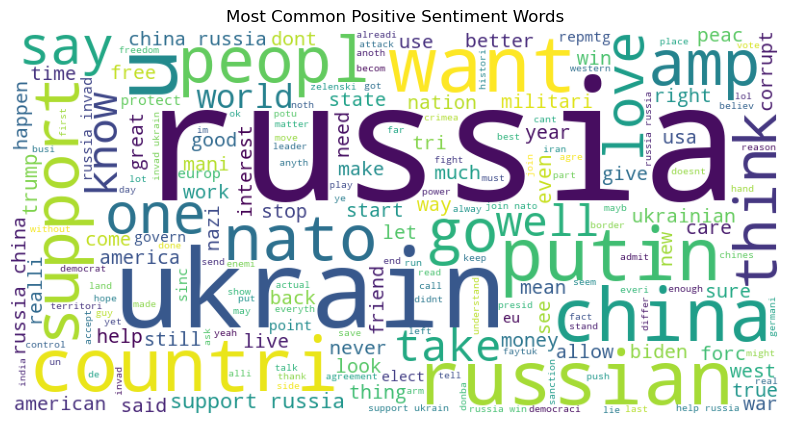

In [188]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title("Most Common Positive Sentiment Words")
plt.axis("off")
plt.show()

###  Most frequent words used by people with negative sentiments

In [189]:
negative_sentiment_filter = tweets_sentiment_df['Negative'] > tweets_sentiment_df["Positive"]
negative =' '.join([i for i in tweets_sentiment_df['processed_tweet'][negative_sentiment_filter]])

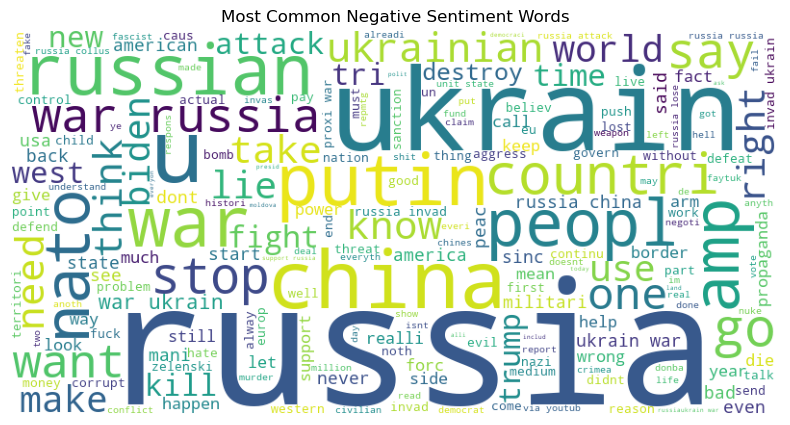

In [190]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Negative Sentiment Words")
plt.show()

###  Most frequent words used by people with neutral sentiments

In [194]:
neutral_sentiment_filter = (tweets_sentiment_df['Negative'] <= 0) & (tweets_sentiment_df['Positive'] <= 0)
neutral_tweets = ' '.join(tweets_sentiment_df['processed_tweet'][neutral_sentiment_filter])

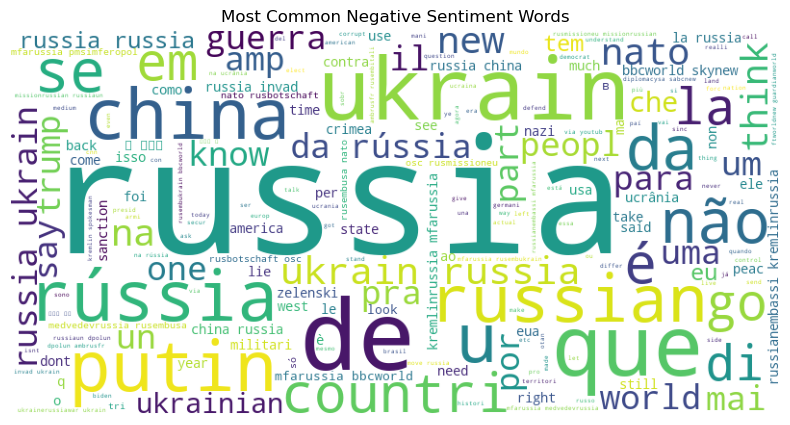

In [195]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(neutral_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Negative Sentiment Words")
plt.show()

#### Sentiment Timeline

In [197]:
tweets_sentiment_df

,username,tweet,processed_tweet,language,created_at,Positive,Negative,Neutral
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,nazijaeg derwen anonymous9775 russia place sat...,en,2023-02-28 00:36:15 UTC,0.231,0.000,0.769
1,paperfloure,The Russia HAARP which could destroy USA in on...,russia haarp could destroy usa one fell swoop ...,en,2023-02-28 00:36:13 UTC,0.000,0.259,0.741
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,putin give steven seagal russiaamp8217 order f...,en,2023-02-28 00:36:13 UTC,0.293,0.000,0.707
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,mainelif baddcompani ’ alway project russia,en,2023-02-28 00:36:12 UTC,0.000,0.000,1.000
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,pottingpink mfarussia modrussia milhistrf muze...,en,2023-02-28 00:36:12 UTC,0.065,0.076,0.859
...,...,...,...,...,...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,wallacemick ukrain invester war russia putin w...,en,2023-02-27 22:16:41 UTC,0.000,0.415,0.585
10010,marxistswon,@tom_username_ There were very dark rumors tha...,tomusernam dark rumor zelenski regim traffick ...,en,2023-02-27 22:16:40 UTC,0.000,0.112,0.888
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,elonmusk russia lose rothschild come next russ...,en,2023-02-27 22:16:40 UTC,0.000,0.184,0.816
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,ronfilipkowski look forward russia liber kiev,en,2023-02-27 22:16:39 UTC,0.000,0.000,1.000


In [206]:
# a function to calculate sentiment polarity (-1 for negative, 1 for positive)
def calculate_sentiment_polarity(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

In [207]:
# a function to calculate sentiment polarity (-1 for negative, 1 for positive)
def calculate_sentiment_subjectivity(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.subjectivity

In [208]:
tweets_sentiment_df["polar_sentiment"] = tweets_sentiment_df["processed_tweet"].apply(calculate_sentiment_polarity)


C:\Users\tanve\AppData\Local\Temp\ipykernel_7292\548865948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentiment_df["polar_sentiment"] = tweets_sentiment_df["processed_tweet"].apply(calculate_sentiment_polarity)


In [210]:
tweets_sentiment_df["subjectivity"] = tweets_sentiment_df["processed_tweet"].apply(calculate_sentiment_subjectivity)

C:\Users\tanve\AppData\Local\Temp\ipykernel_7292\3668192211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentiment_df["subjectivity"] = tweets_sentiment_df["processed_tweet"].apply(calculate_sentiment_subjectivity)


In [211]:
tweets_sentiment_df

,username,tweet,processed_tweet,language,created_at,Positive,Negative,Neutral,polar_sentiment,subjectivity
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,nazijaeg derwen anonymous9775 russia place sat...,en,2023-02-28 00:36:15 UTC,0.231,0.000,0.769,0.00,0.0
1,paperfloure,The Russia HAARP which could destroy USA in on...,russia haarp could destroy usa one fell swoop ...,en,2023-02-28 00:36:13 UTC,0.000,0.259,0.741,-0.20,0.0
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,putin give steven seagal russiaamp8217 order f...,en,2023-02-28 00:36:13 UTC,0.293,0.000,0.707,0.00,0.0
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,mainelif baddcompani ’ alway project russia,en,2023-02-28 00:36:12 UTC,0.000,0.000,1.000,0.00,0.0
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,pottingpink mfarussia modrussia milhistrf muze...,en,2023-02-28 00:36:12 UTC,0.065,0.076,0.859,-0.40,0.5
...,...,...,...,...,...,...,...,...,...,...
10009,ahk14061,@wallacemick Its not Ukraine which investere w...,wallacemick ukrain invester war russia putin w...,en,2023-02-27 22:16:41 UTC,0.000,0.415,0.585,0.00,0.0
10010,marxistswon,@tom_username_ There were very dark rumors tha...,tomusernam dark rumor zelenski regim traffick ...,en,2023-02-27 22:16:40 UTC,0.000,0.112,0.888,-0.15,0.4
10011,johngerver21,@elonmusk If Russia lose the Rothschild are co...,elonmusk russia lose rothschild come next russ...,en,2023-02-27 22:16:40 UTC,0.000,0.184,0.816,0.00,0.0
10012,late49er,@RonFilipkowski Look forward to Russia liberat...,ronfilipkowski look forward russia liber kiev,en,2023-02-27 22:16:39 UTC,0.000,0.000,1.000,0.00,0.0


In [212]:
tweets_sentiment_df["created_at"] = pd.to_datetime(tweets_sentiment_df["created_at"])

C:\Users\tanve\AppData\Local\Temp\ipykernel_7292\2111459421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentiment_df["created_at"] = pd.to_datetime(tweets_sentiment_df["created_at"])


In [213]:
tweets_sentiment_df.head(3)

,username,tweet,processed_tweet,language,created_at,Positive,Negative,Neutral,polar_sentiment,subjectivity
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,nazijaeg derwen anonymous9775 russia place sat...,en,2023-02-28 00:36:15+00:00,0.231,0.000,0.769,0.0,0.0
1,paperfloure,The Russia HAARP which could destroy USA in on...,russia haarp could destroy usa one fell swoop ...,en,2023-02-28 00:36:13+00:00,0.000,0.259,0.741,-0.2,0.0
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,putin give steven seagal russiaamp8217 order f...,en,2023-02-28 00:36:13+00:00,0.293,0.000,0.707,0.0,0.0


In [214]:
# Define the time intervals (e.g., daily)
time_intervals = pd.date_range(start=tweets_sentiment_df['created_at'].min(), 
                               end=tweets_sentiment_df['created_at'].max(), 
                               freq='D')

In [240]:
tweets_sentiment_df["created_at"].dt.day.value_counts()

created_at
27    7762
28    2252
Name: count, dtype: int64

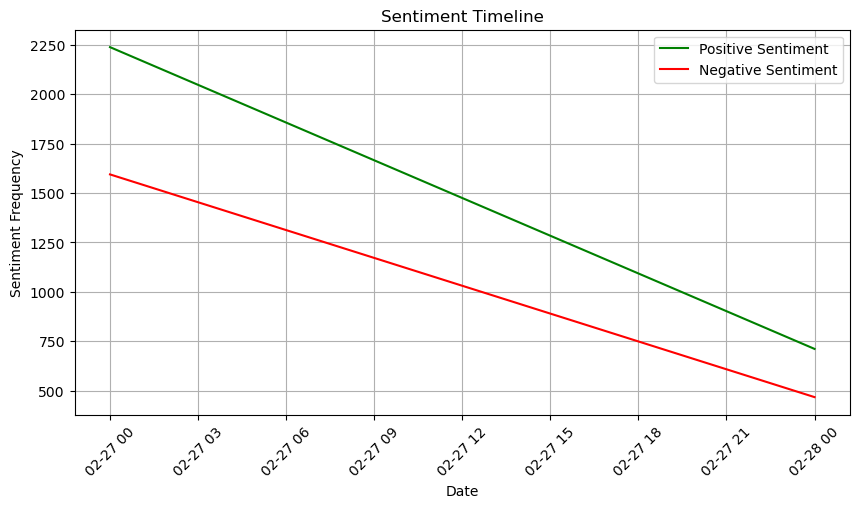

In [232]:
# Create a line chart for sentiment over time
plt.figure(figsize=(10, 5))

for sentiment_type, color in [('positive', 'g'), ('negative', 'r')]:
    sentiment_counts = tweets_sentiment_df[(tweets_sentiment_df['polar_sentiment'] > 0) if sentiment_type == 'positive' else (tweets_sentiment_df['polar_sentiment'] < 0)]
    sentiment_counts = sentiment_counts.groupby(tweets_sentiment_df['created_at'].dt.floor('D')).size()
    plt.plot(sentiment_counts.index, sentiment_counts.values, label=f'{sentiment_type.capitalize()} Sentiment', color=color)

plt.xlabel('Date')
plt.ylabel('Sentiment Frequency')
plt.title('Sentiment Timeline')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

### Daily Sentiment Trends

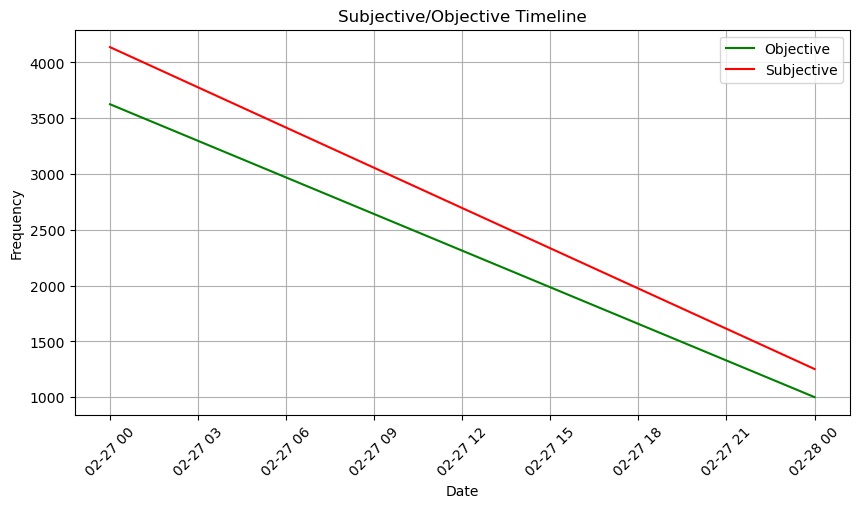

In [248]:
# Create a line chart for sentiment over time
plt.figure(figsize=(10, 5))

for sentiment_type, color in [('objective', 'g'), ('subjective', 'r')]:
    sentiment_counts = tweets_sentiment_df[(tweets_sentiment_df['subjectivity'] == 0) if sentiment_type == 'objective' else (tweets_sentiment_df['subjectivity'] > 0)]
    sentiment_counts = sentiment_counts.groupby(tweets_sentiment_df['created_at'].dt.floor('D')).size()
    plt.plot(sentiment_counts.index, sentiment_counts.values, label=f'{sentiment_type.capitalize()}', color=color)

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Subjective/Objective Timeline')
plt.xticks(rotation=45)
plt.legend()
plt.grid()